### Install dependencies

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import pandas as pd


### 1. 데이터 로드 및 구조 확인
해당 코드를 실행하여 Iris 데이터셋을 불러오고 구조를 확인하시오.
import seaborn as sns
iris = sns.load_dataset('iris')
head(), info()로 데이터 구조 확인


In [2]:
iris = sns.load_dataset('iris')
iris.head()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2. 기술통계량
Species별 Petal Length의 평균, 개수, 표준편차, 최소/최대, 사분위수 등을 출력하고 그룹별 데이터 개수를 확인하시오.


In [5]:
petal_length = iris['petal_length']
mean_petal_length = petal_length.mean()
median_petal_length = petal_length.median()
sd_petal_length = petal_length.std()
max_petal_length = petal_length.max()
min_petal_length = petal_length.min()
quartile_25 = petal_length.quantile(0.25)
quartile_75 = petal_length.quantile(0.75)
count_petal_length = petal_length.count()
petal_length_by_species_count = iris.groupby('species')['petal_length'].count()
print(f"Mean Petal Length: {mean_petal_length}\n"
      f"Median Petal Length: {median_petal_length}\n"
      f"Standard Deviation of Petal Length: {sd_petal_length}\n"
      f"Max Petal Length: {max_petal_length}\n"
      f"Min Petal Length: {min_petal_length}\n"
      f"25th Percentile of Petal Length: {quartile_25}\n"
      f"75th Percentile of Petal Length: {quartile_75}\n"
      f"Count of Petal Length: {count_petal_length}\n"
      f"Petal Length Count by Species:\n{petal_length_by_species_count}")

Mean Petal Length: 3.7580000000000005
Median Petal Length: 4.35
Standard Deviation of Petal Length: 1.7652982332594667
Max Petal Length: 6.9
Min Petal Length: 1.0
25th Percentile of Petal Length: 1.6
75th Percentile of Petal Length: 5.1
Count of Petal Length: 150
Petal Length Count by Species:
species
setosa        50
versicolor    50
virginica     50
Name: petal_length, dtype: int64


### 3. 시각화
Species별 Petal Length의 분포를 Boxplot으로 시각화 하시오.
간단한 해석 작성


Text(0.5, 1.0, 'Boxplot of Petal Length by Species')

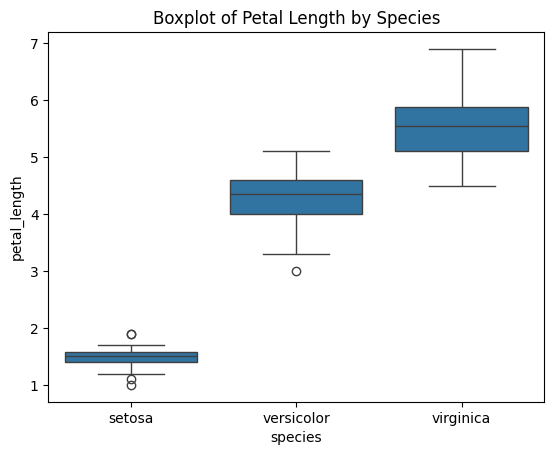

In [6]:
boxplot = sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Boxplot of Petal Length by Species')

해석: 종류별 petal length의 평균값은 차이가 난다. Setosa, Versicolor Species중에 이상치도 있는것 같다. Variance within group으로 살펴보면, Setosa< Versicolor < Virginica를 관찰될 수 있다

### 4. 정규성 검정 (Shapiro-Wilk)
Species별로 Shapiro-Wilk 검정을 실시하시오.(해당 검정에 대한 가설 수립 포함)
각 species별 p-value 출력하고, 0.05를 기준으로 해석하시오.
(단, 이후 분석은 정규성을 만족한다고 가정한다.)
(Hint: scipy.stats.shapiro() 함수로 활용 가능)


In [31]:
target_col = ['petal_length']
alpha = 0.05

for target_col in target_col:
    print(f"=== Shapiro-Wilk Test for '{target_col}' ===")
    print(f"H0: Data follows Normal Distribution (p > {alpha})")
    print("-" * 60)
    print(f"{'Species':<15} | {'Statistic':<10} | {'P-Value':<12} | {'Result'}")
    print("-" * 60)

    # Species별 그룹화 및 검정 수행

    for species in iris['species'].unique():
        # 해당 Species의 데이터 추출
        subset = iris[iris['species'] == species][target_col]
        
        # Shapiro-Wilk 검정 수행
        stat, p_value = stats.shapiro(subset)
        
        # 결과 해석
        is_normal = p_value > alpha
        interpretation = "Normal (H0 채택)" if is_normal else "Not Normal (H0 기각)"
        
        # 결과 출력 (소수점 4자리 포맷팅)
        print(f"{species:<15} | {stat:.4f}     | {p_value:.4f}       | {interpretation}")
        print(" " * 60)

print("-" * 60)
print("※ 지침에 따라 검정 결과와 무관하게 이후 분석은 정규성을 만족한다고 가정합니다.")

=== Shapiro-Wilk Test for 'petal_length' ===
H0: Data follows Normal Distribution (p > 0.05)
------------------------------------------------------------
Species         | Statistic  | P-Value      | Result
------------------------------------------------------------
setosa          | 0.9550     | 0.0548       | Normal (H0 채택)
                                                            
versicolor      | 0.9660     | 0.1585       | Normal (H0 채택)
                                                            
virginica       | 0.9622     | 0.1098       | Normal (H0 채택)
                                                            
------------------------------------------------------------
※ 지침에 따라 검정 결과와 무관하게 이후 분석은 정규성을 만족한다고 가정합니다.


### 5. 등분산성 검정 (Levene)
Levene 검정을 통해 3개 그룹 간 등분산성을 검정하시오.
p-value를 출력하고, 0.05를 기준으로 해석하시오.
(단, 이후 분석은 등분산성을 만족한다고 가정한다.)
(Hint: scipy.stats.levene() 함수로 활용 가능)


In [32]:
target_cols = ['petal_length']
alpha = 0.05

print(f"{'Variable':<15} | {'Statistic':<10} | {'P-Value':<12} | {'Result'}")
print("-" * 65)

for col in target_cols:
    # 1. Levene 검정을 위해 Species별로 데이터를 분리하여 리스트에 담음
    groups = [iris[iris['species'] == s][col] for s in iris['species'].unique()]
    
    # 2. Levene 검정 수행 (*groups로 리스트 언패킹하여 전달)
    stat, p_value = stats.levene(*groups)
    
    # 3. 결과 해석
    # H0: 모든 그룹의 분산이 동일하다 (등분산성 만족)
    # H1: 적어도 한 그룹의 분산이 다르다 (등분산성 위배)
    is_homoscedastic = p_value > alpha
    interpretation = "Equal Var (H0 채택)" if is_homoscedastic else "Not Equal (H0 기각)"
    
    # 4. 출력
    print(f"{col:<15} | {stat:.4f}     | {p_value:.4f}       | {interpretation}")

print("-" * 65)
print("※ Levene Test H0: 각 그룹(Species) 간 분산은 동일하다.")

Variable        | Statistic  | P-Value      | Result
-----------------------------------------------------------------
petal_length    | 19.4803     | 0.0000       | Not Equal (H0 기각)
-----------------------------------------------------------------
※ Levene Test H0: 각 그룹(Species) 간 분산은 동일하다.


### 6. ANOVA 가설 수립
아래 가설을 수립하시오.
H0: 세 species 간 ~~
H1: 적어도 ~~


In [33]:
target_cols = ['petal_length']

for col in target_cols:
    print(f"=== ANOVA Hypothesis for '{col}' ===")
    # H0: 모든 그룹의 평균이 같다. (mu1 = mu2 = mu3)
    print(f"H0: 세 species 간 '{col}'의 평균에는 차이가 없다. (모두 동일하다)")
    
    # H1: 하나라도 다른 그룹이 존재한다. (Not H0)
    print(f"H1: 적어도 한 species의 '{col}' 평균은 다른 species와 통계적으로 유의한 차이가 있다.")
    print("-" * 80)

=== ANOVA Hypothesis for 'petal_length' ===
H0: 세 species 간 'petal_length'의 평균에는 차이가 없다. (모두 동일하다)
H1: 적어도 한 species의 'petal_length' 평균은 다른 species와 통계적으로 유의한 차이가 있다.
--------------------------------------------------------------------------------


### 7. One-way ANOVA
One-way ANOVA를 실시하시오.
F값, p-value 확인
유의수준 0.05 기준으로 귀무가설 기각 여부를 쓰시오.


In [34]:
target_cols = ['petal_length']
alpha = 0.05

print(f"=== One-way ANOVA Results ===")
print(f"{'Variable':<15} | {'F-Value':<10} | {'P-Value':<12} | {'Conclusion (alpha=0.05)'}")
print("-" * 80)

for col in target_cols:
    # 1. Species별 데이터 그룹화 (*groups 언패킹을 위해 리스트로 준비)
    groups = [iris[iris['species'] == s][col] for s in iris['species'].unique()]
    
    # 2. ANOVA 수행
    f_val, p_val = stats.f_oneway(*groups)
    
    # 3. 결과 해석
    # P < 0.05 : 귀무가설 기각 (적어도 하나의 그룹 평균은 다르다)
    # P >= 0.05 : 귀무가설 채택 (모든 그룹 평균이 같다)
    if p_val < alpha:
        decision = "H0 기각 (유의한 차이 있음)"
    else:
        decision = "H0 채택 (차이 없음)"
        
    # 4. 출력 (P-value가 매우 작을 수 있으므로 지수 표기법 .4e 사용 권장)
    print(f"{col:<15} | {f_val:.4f}     | {p_val:.4e}   | {decision}")

print("-" * 80)

=== One-way ANOVA Results ===
Variable        | F-Value    | P-Value      | Conclusion (alpha=0.05)
--------------------------------------------------------------------------------
petal_length    | 1180.1612     | 2.8568e-91   | H0 기각 (유의한 차이 있음)
--------------------------------------------------------------------------------


### 8. 사후검정 (Tukey HSD)
ANOVA 결과 유의하다면 Tukey HSD 사후검정을 실시하시오.
어떤 종 사이에 유의미한 차이가 있는지 정리


In [35]:
target_cols = ['petal_length']
alpha = 0.05

for col in target_cols:
    print(f"\n>>> Tukey HSD (Scipy) for '{col}'")
    
    # 1. 데이터 준비 (Species 이름 순서 저장 필수)
    species_names = iris['species'].unique()
    groups = [iris[iris['species'] == s][col] for s in species_names]
    
    # 2. Tukey HSD 수행
    # *groups로 언패킹하여 전달
    res = stats.tukey_hsd(*groups)
    
    # 3. 결과 출력
    print(res)
    
    # 4. 결과 해석 가이드 (인덱스 매핑)
    print("-" * 50)
    print("※ Group Index Mapping:")
    for idx, name in enumerate(species_names):
        print(f"  Group {idx}: {name}")
        
    # 5. 유의미한 차이 판별 (P-value Matrix 분석)
    # res.pvalue는 대칭 행렬입니다. (i, j)가 두 그룹 간의 p-value
    print(f"\n[Significant Differences (p < {alpha})]")
    
    # 상삼각행렬(Upper triangle)만 순회하여 중복 제거
    rows, cols = res.pvalue.shape
    diff_found = False
    
    for i in range(rows):
        for j in range(i + 1, cols):
            p_val = res.pvalue[i][j]
            if p_val < alpha:
                print(f"  - {species_names[i]} vs {species_names[j]} (p={p_val:.4f}) -> 차이 있음")
                diff_found = True
    
    if not diff_found:
        print("  - 유의미한 차이 없음")
        
    print("=" * 60)


>>> Tukey HSD (Scipy) for 'petal_length'
Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -2.798     0.000    -3.002    -2.594
 (0 - 2)     -4.090     0.000    -4.294    -3.886
 (1 - 0)      2.798     0.000     2.594     3.002
 (1 - 2)     -1.292     0.000    -1.496    -1.088
 (2 - 0)      4.090     0.000     3.886     4.294
 (2 - 1)      1.292     0.000     1.088     1.496

--------------------------------------------------
※ Group Index Mapping:
  Group 0: setosa
  Group 1: versicolor
  Group 2: virginica

[Significant Differences (p < 0.05)]
  - setosa vs versicolor (p=0.0000) -> 차이 있음
  - setosa vs virginica (p=0.0000) -> 차이 있음
  - versicolor vs virginica (p=0.0000) -> 차이 있음


### 9. 결과 요약
Boxplot, ANOVA, 사후검정 결과를 종합하여
어떤 그룹의 Petal Length가 통계적으로 유의하게 긴지/짧은지 간단히 결론 지으시오.


결과 요약 (Conclusion)  
분석 결과, 세 Species 간의 Petal Length는 모두 통계적으로 유의미한 차이가 있습니다.

**1. 크기 순서 평균값을 기준으로 꽃잎 길이는 다음 순서대로 깁니다.**

Virginica > Versicolor > Setosa  
(ingroup variance는 반대로)

**2. 통계적 근거**

ANOVA: P-value < 0.05로 귀무가설이 기각되어, 세 그룹 중 적어도 하나는 차이가 있음을 확인했습니다.

사후검정 (Tukey HSD): 모든 조합에서 유의미한 차이(Reject H0)가 확인되었습니다. 즉, 세 그룹은 서로 명확하게 구분되는 집단입니다.

Boxplot: 시각적으로도 세 그룹의 분포(Box)가 겹치지 않고 높이 차이가 뚜렷하게 나타납니다.

### 10. 회귀 분석
입력: sepal_length, sepal_width, petal_width
타겟: petal_length
Train/Test 분리
Linear Regression 학습
MSE, R2, 회귀계수 출력 및 해석

In [28]:
# 1. 데이터 준비
features = ['sepal_length', 'sepal_width', 'petal_width']
target = 'petal_length'

X = iris[features]
y = iris[target]

# 2. Train/Test 분리 (8:2 비율, 재현성을 위해 seed 고정)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5. 결과 출력
print(f"=== Regression Performance Metrics ===")
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"R2 Score (결정계수)     : {r2:.4f}")
print("-" * 40)

print(f"\n=== Regression Coefficients ===")
# 회귀계수와 피처명을 매핑하여 가독성 확보
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print(f"Intercept (절편): {model.intercept_:.4f}")
print(coef_df)
print("-" * 40)

=== Regression Performance Metrics ===
MSE (Mean Squared Error): 0.1300
R2 Score (결정계수)     : 0.9603
----------------------------------------

=== Regression Coefficients ===
Intercept (절편): -0.2622
        Feature  Coefficient
0  sepal_length     0.722815
1   sepal_width    -0.635816
2   petal_width     1.467524
----------------------------------------
